In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [41]:
df = pd.read_csv('Beason-Totals.csv')

In [42]:
df

,Player,Passes Attempted,Pass Cmp%,Prog Carries,Prog Passes,Tackles,Interceptions,Shots Blocked,Fouls,Aerial Duels,Ball Recoveries
0,Judson,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Remedi,51.295337,86.783333,0.518135,1.381693,1.208981,1.381693,1.899827,0.345423,4.663212,9.153713
2,Both,39.750000,87.525000,0.000000,0.250000,0.750000,2.000000,1.500000,0.500000,5.250000,5.500000


In [43]:
#df['Match'] = df['Match'].str.split('\\',expand=True)[0]

In [44]:
df.Player.unique()

array(['Judson', 'Remedi', 'Both'], dtype=object)

In [45]:
df = df[(df['Player']=='Judson') | (df['Player']=='Remedi') | (df['Player']=='Both')].reset_index()

In [46]:
df

,index,Player,Passes Attempted,Pass Cmp%,Prog Carries,Prog Passes,Tackles,Interceptions,Shots Blocked,Fouls,Aerial Duels,Ball Recoveries
0,0,Judson,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,Remedi,51.295337,86.783333,0.518135,1.381693,1.208981,1.381693,1.899827,0.345423,4.663212,9.153713
2,2,Both,39.750000,87.525000,0.000000,0.250000,0.750000,2.000000,1.500000,0.500000,5.250000,5.500000


In [47]:
#df = df.drop(['index','Nation','Pos','Age','90s','Goals','Shots','npxG','Assists','Passes Leading to a Shot','Passes into Pen','Pressures Att 3rd','Dribble Succ%','Carries into Pen Area','Shots on Target','Shots on Target%','G/SoT','xG','npxG/Sh','Sh/90','SoT/90','G/Sh','Att','CrsPA','Touches in Att Pen',],axis=1)
#df = df.drop(['index','Team','Position','Age','Accurate passes to final third, %','Passes to penalty area per 90','Passes to final third per 90','Accurate passes to penalty area, %'],axis=1)
df = df.drop(['index'],axis=1)

In [48]:
df

,Player,Passes Attempted,Pass Cmp%,Prog Carries,Prog Passes,Tackles,Interceptions,Shots Blocked,Fouls,Aerial Duels,Ball Recoveries
0,Judson,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Remedi,51.295337,86.783333,0.518135,1.381693,1.208981,1.381693,1.899827,0.345423,4.663212,9.153713
2,Both,39.750000,87.525000,0.000000,0.250000,0.750000,2.000000,1.500000,0.500000,5.250000,5.500000


In [49]:
params = list(df.columns)
params = params[1:]
params

['Passes Attempted',
 'Pass Cmp%',
 'Prog Carries',
 'Prog Passes',
 'Tackles',
 'Interceptions',
 'Shots Blocked',
 'Fouls ',
 'Aerial Duels',
 'Ball Recoveries']

In [50]:
ranges = []
a_values = []
b_values = []
c_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.15)
    
    b = max(df[params][x])
    b = b + (b*.15)
    
    c = min(df[params][x])
    c = c - (c*0.15)
    
    ranges.append((a,b,c))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'Judson':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Remedi':
        b_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Both':
        c_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]
c_values = c_values[1:]


values = [a_values,b_values,c_values]

In [51]:
values

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [51.29533679,
  86.78333333,
  0.518134715,
  1.381692573,
  1.208981002,
  1.381692573,
  1.8998272880000002,
  0.3454231434,
  4.663212435,
  9.153713299],
 [39.75, 87.525, 0.0, 0.25, 0.75, 2.0, 1.5, 0.5, 5.25, 5.5]]

In [52]:
title = dict(
    title_name='Jackson Yueill',
    title_color = 'royalblue',
    subtitle_name = 'vs. Minnesota',
    subtitle_color = 'royalblue',
    title_name_2='Jackson Yueill',
    title_color_2 = 'gray',
    subtitle_name_2 = 'vs. Vancouver',
    subtitle_color_2 = 'gray',
    title_fontsize = 18,
    subtitle_fontsize=8
)

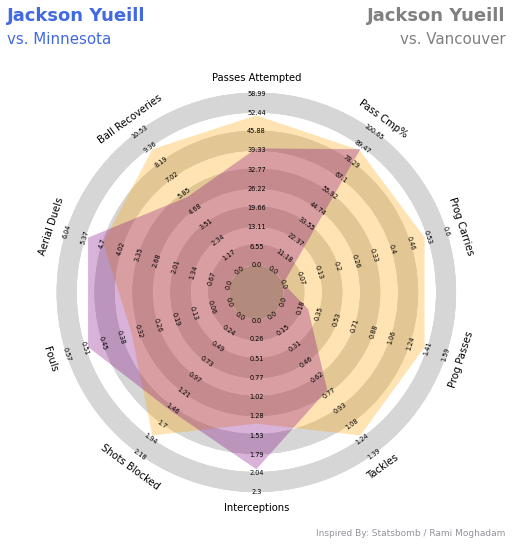

In [53]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['green','orange','purple'],
                         alphas=[.3,.3,0.3],
                         title=title,
                         figsize = (20, 20),
                         compare=True)


